## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
# from datetime import datetime

import matplotlib.pyplot as plt # Intermediate Visualization
import seaborn as sns # Advanced Vizualization
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans # K-means clustering
from yellowbrick.cluster import SilhouetteVisualizer # Silhouette Analysis for k-means clustering

## LOAD PICKLES

In [2]:
# I have selected the relevant column in 1_cluster_buyer_prep.ipynb and save it on pickles
# Load dfos_c.pkl into dfos_c DataFrame
dfob_c = pd.read_pickle('pickles/dfob_c.pkl')

# Load dfos.pkl into dfos DataFrame
dfob = pd.read_pickle('pickles/dfob.pkl')

In [3]:
dfob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12810 entries, 0 to 12809
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   buyer_id                12810 non-null  object        
 1   last_transaction        12810 non-null  datetime64[ns]
 2   recency_day             12810 non-null  int64         
 3   order_freq              12810 non-null  int64         
 4   gmv                     12810 non-null  int64         
 5   aov                     12810 non-null  float64       
 6   revenue                 12810 non-null  int64         
 7   voucher_used            12810 non-null  int64         
 8   voucher_val             12810 non-null  float64       
 9   seller_count            12810 non-null  int64         
 10  num_of_seller_province  12810 non-null  int64         
 11  num_of_seller_city      12810 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(8), ob

In [4]:
dfob_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12810 entries, 0 to 12809
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   recency_day             12810 non-null  int64  
 1   order_freq              12810 non-null  int64  
 2   gmv                     12810 non-null  int64  
 3   aov                     12810 non-null  float64
 4   revenue                 12810 non-null  int64  
 5   voucher_used            12810 non-null  int64  
 6   voucher_val             12810 non-null  float64
 7   seller_count            12810 non-null  int64  
 8   num_of_seller_province  12810 non-null  int64  
 9   num_of_seller_city      12810 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1000.9 KB


## OUTLIERS

In [5]:
relevant_column = ['recency_day',
                   'order_freq',
                   'gmv',
                   'aov',
                   'revenue',
                   'voucher_used',
                   'voucher_val',
                   'seller_count',
                   'num_of_seller_province',
                   'num_of_seller_city']
dfob_c.describe()

,recency_day,order_freq,gmv,aov,revenue,voucher_used,voucher_val,seller_count,num_of_seller_province,num_of_seller_city
count,12810.000000,12810.000000,1.281000e+04,1.281000e+04,1.281000e+04,12810.000000,1.281000e+04,12810.000000,12810.000000,12810.000000
mean,81.225527,12.422560,2.925306e+08,1.210464e+07,1.895458e+06,0.402810,2.558012e+04,2.619672,1.415535,1.903981
std,90.057400,46.133779,1.937830e+09,1.301664e+08,1.114575e+07,0.987291,1.897701e+05,3.842933,0.941870,1.930438
min,1.000000,1.000000,2.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000,1.000000,1.000000
25%,16.000000,1.000000,1.177000e+05,8.804579e+04,8.820000e+02,0.000000,0.000000e+00,1.000000,1.000000,1.000000
50%,41.000000,3.000000,6.111295e+05,1.722575e+05,4.580500e+03,0.000000,0.000000e+00,1.000000,1.000000,1.000000
75%,120.750000,8.000000,5.216839e+07,5.908083e+06,3.912625e+05,1.000000,2.500000e+04,3.000000,1.000000,2.000000
max,365.000000,2207.000000,7.233011e+10,1.277778e+10,4.715240e+08,24.000000,1.000000e+07,86.000000,18.000000,47.000000


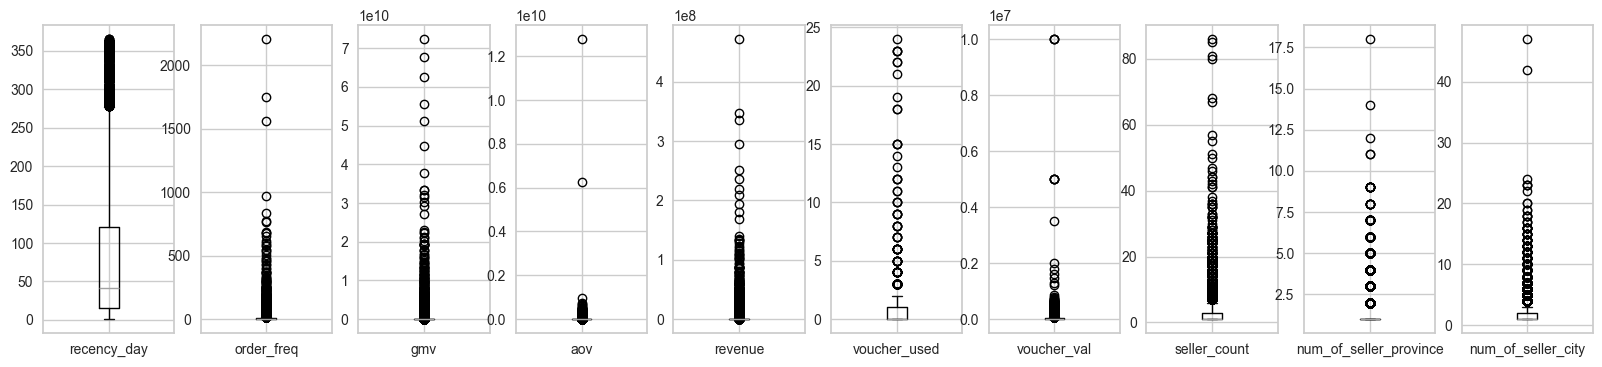

In [6]:
# We will not remove any outlier, let it be identified as their own cluster (hopefully)
# Plot
fig, axes = plt.subplots(nrows=1, ncols=10,figsize=(20,4))
for i,el in enumerate(relevant_column):
    a = dfob_c.boxplot(el, ax=axes.flatten()[i],grid=True)

# plt.show()

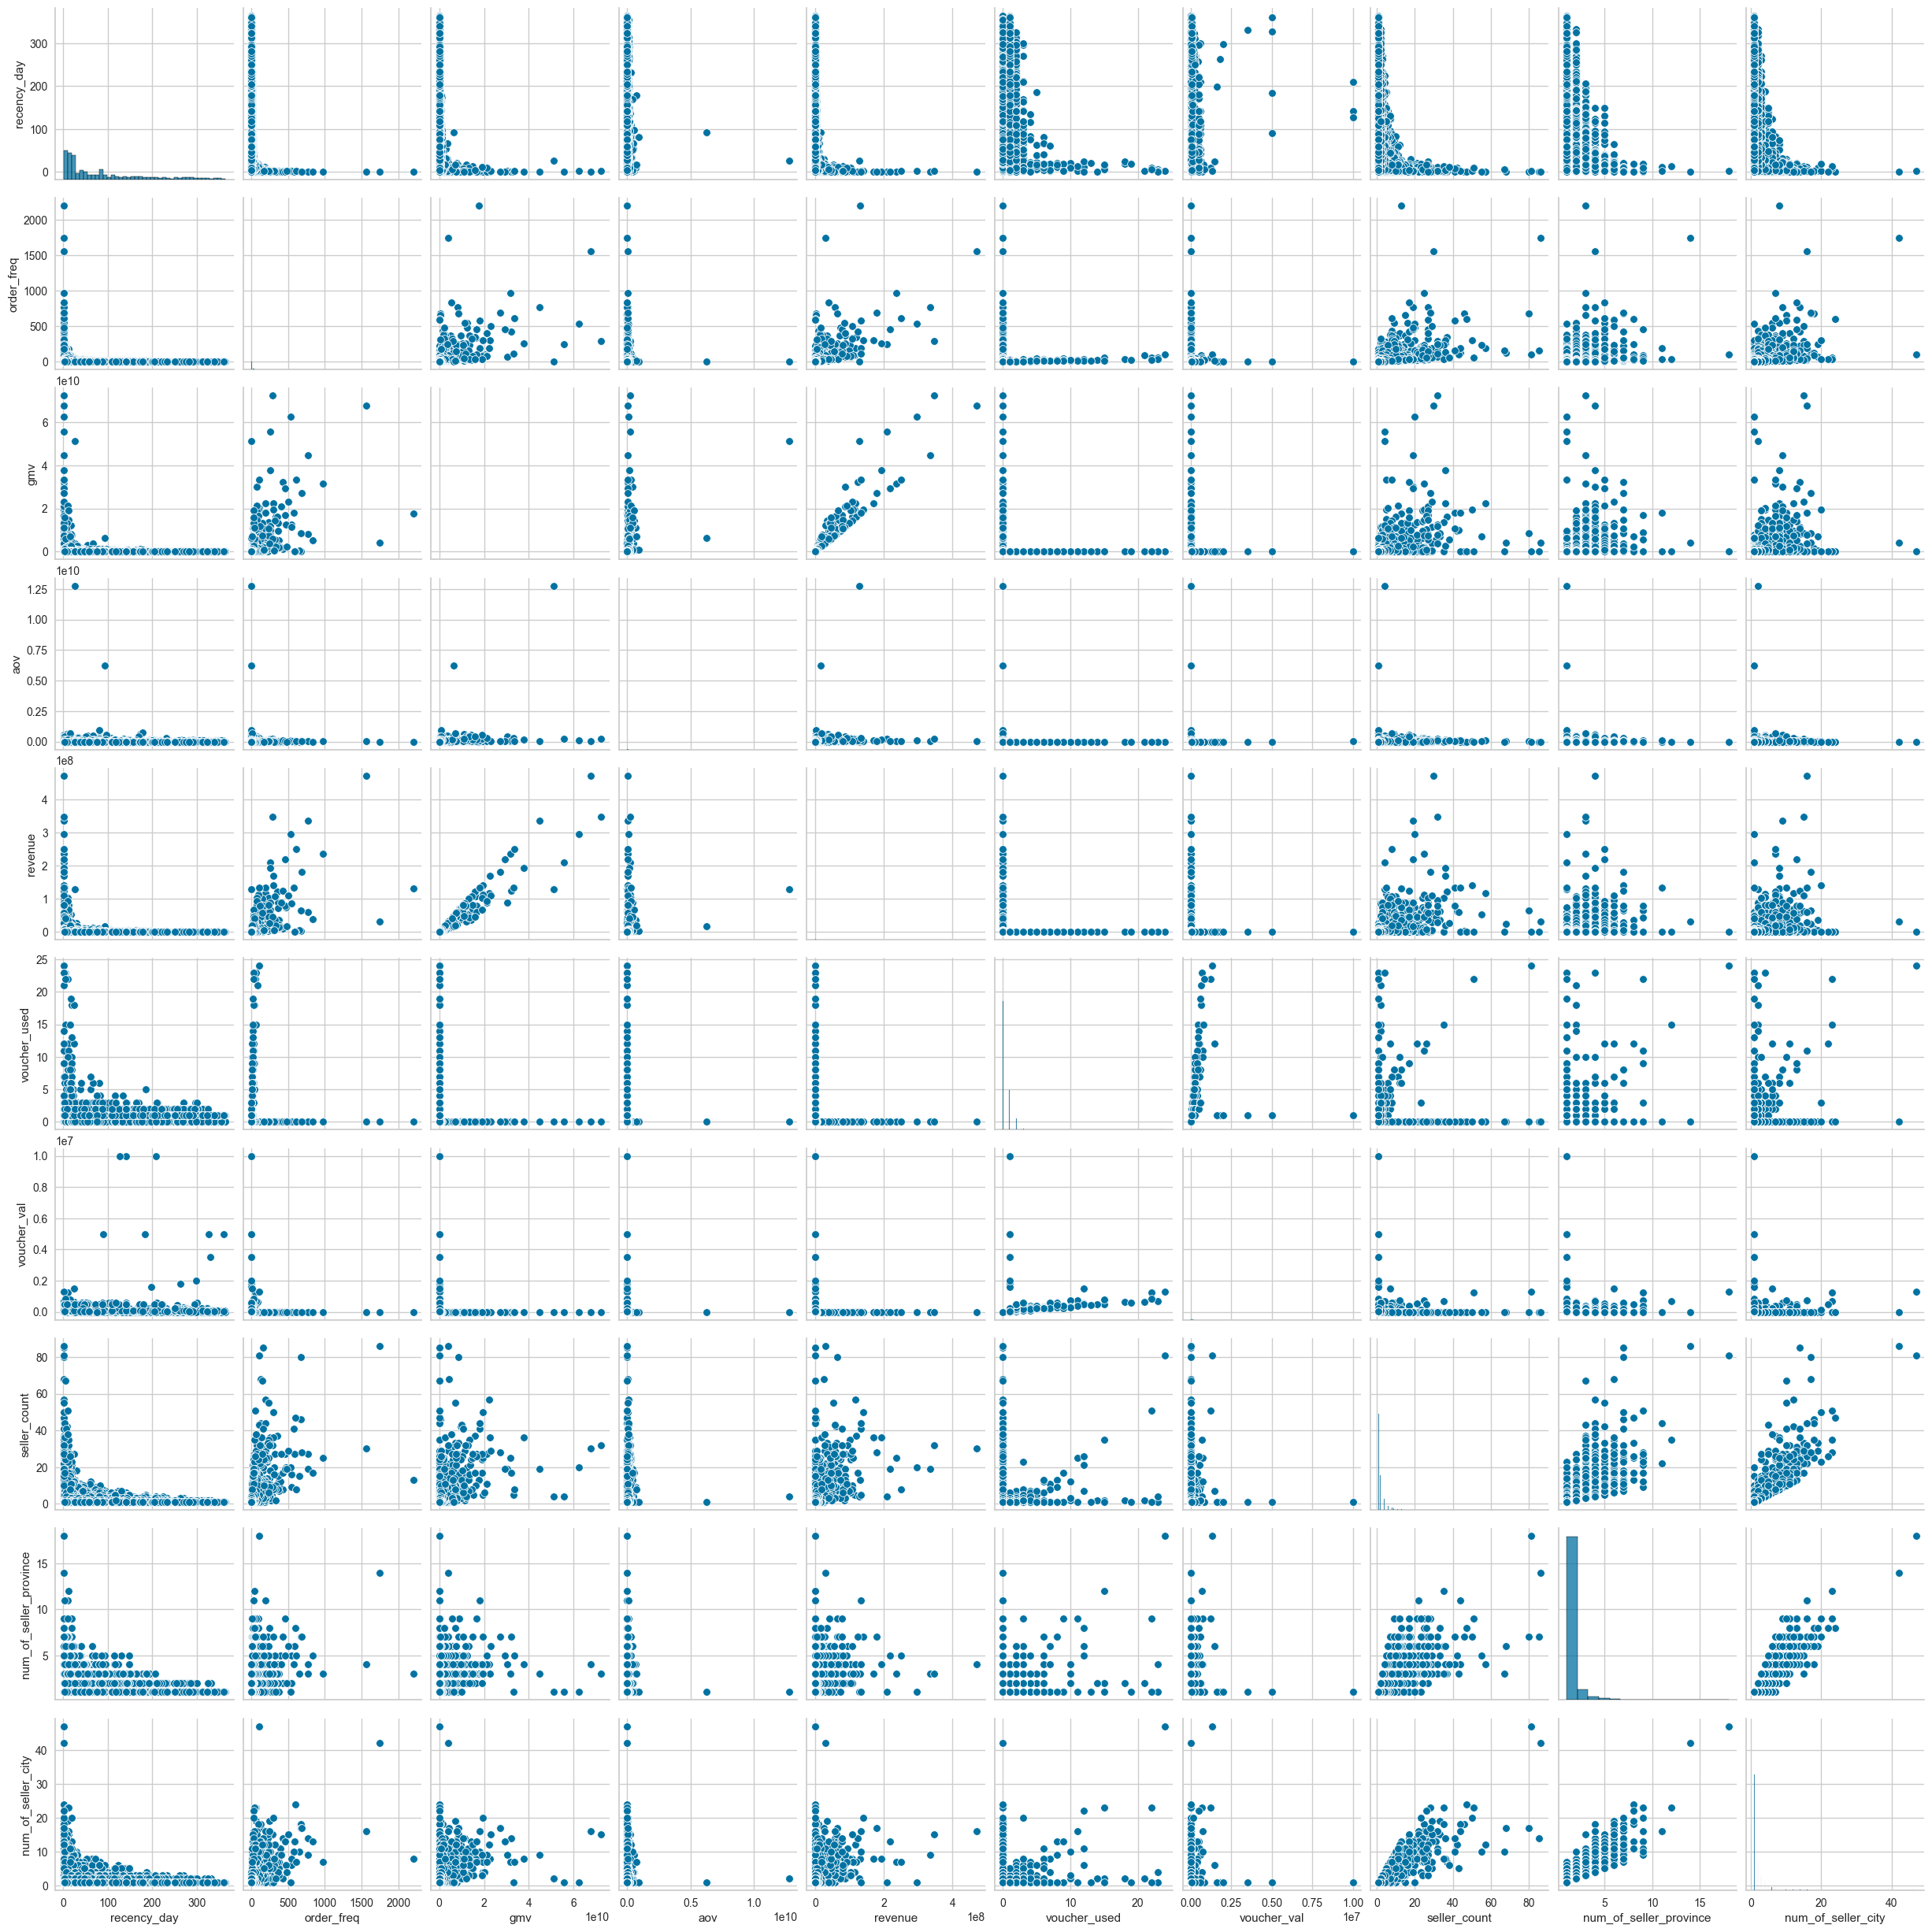

In [31]:
sns.pairplot(dfob_c)

## SCALE

In [8]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Create a copy of the dataframe to preserve the original data
dfob_cs = dfob_c.copy()
# Perform MinMax scaling on the selected columns
dfob_cs[relevant_column] = scaler.fit_transform(dfob_cs[relevant_column])

# Show the first few rows of the scaled dataframe
dfob_cs.head()

,recency_day,order_freq,gmv,aov,revenue,voucher_used,voucher_val,seller_count,num_of_seller_province,num_of_seller_city
0,0.027473,0.026745,0.002904,0.000274,0.003340,0.0,0.0,0.129412,0.352941,0.173913
1,0.005495,0.049411,0.030780,0.001584,0.035411,0.0,0.0,0.200000,0.235294,0.239130
2,0.005495,0.015413,0.072108,0.011662,0.040356,0.0,0.0,0.164706,0.294118,0.239130
3,0.120879,0.000453,0.000033,0.000093,0.000038,0.0,0.0,0.000000,0.000000,0.000000
4,0.263736,0.000000,0.000011,0.000061,0.000012,0.0,0.0,0.000000,0.000000,0.000000


## ELBOW METHOD

In [9]:
# For each n_clusters between 1 and 10, we calculate the distortion value
distortions = []
K = range(1,12)
for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 1000, n_init='auto')
  kmeanModel.fit(dfob_cs)
  distortions.append(kmeanModel.inertia_)

distortions

[921.694143062389,
 315.8550348280503,
 211.39471531786478,
 169.023610425752,
 126.66704929154429,
 112.04719758361814,
 100.18638800959476,
 92.73405425020238,
 86.62601801524772,
 80.32534714081157,
 72.32493158683]

<Figure size 1600x800 with 0 Axes>

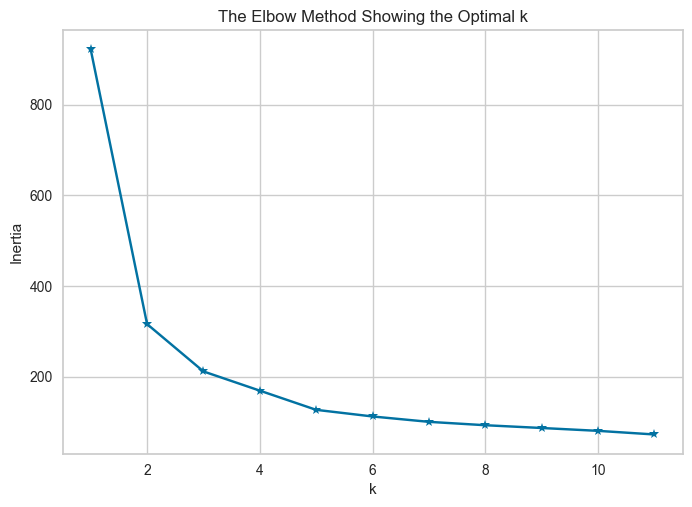

In [10]:
plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method Showing the Optimal k')
plt.show()

Potential optimal k: 2, 3, 5

## SILHOUETTE METHOD

For k=2, the average silhouette score is 0.6416073292160952
For k=3, the average silhouette score is 0.5108937541962367
For k=4, the average silhouette score is 0.45344725735672936
For k=5, the average silhouette score is 0.4920839589294662


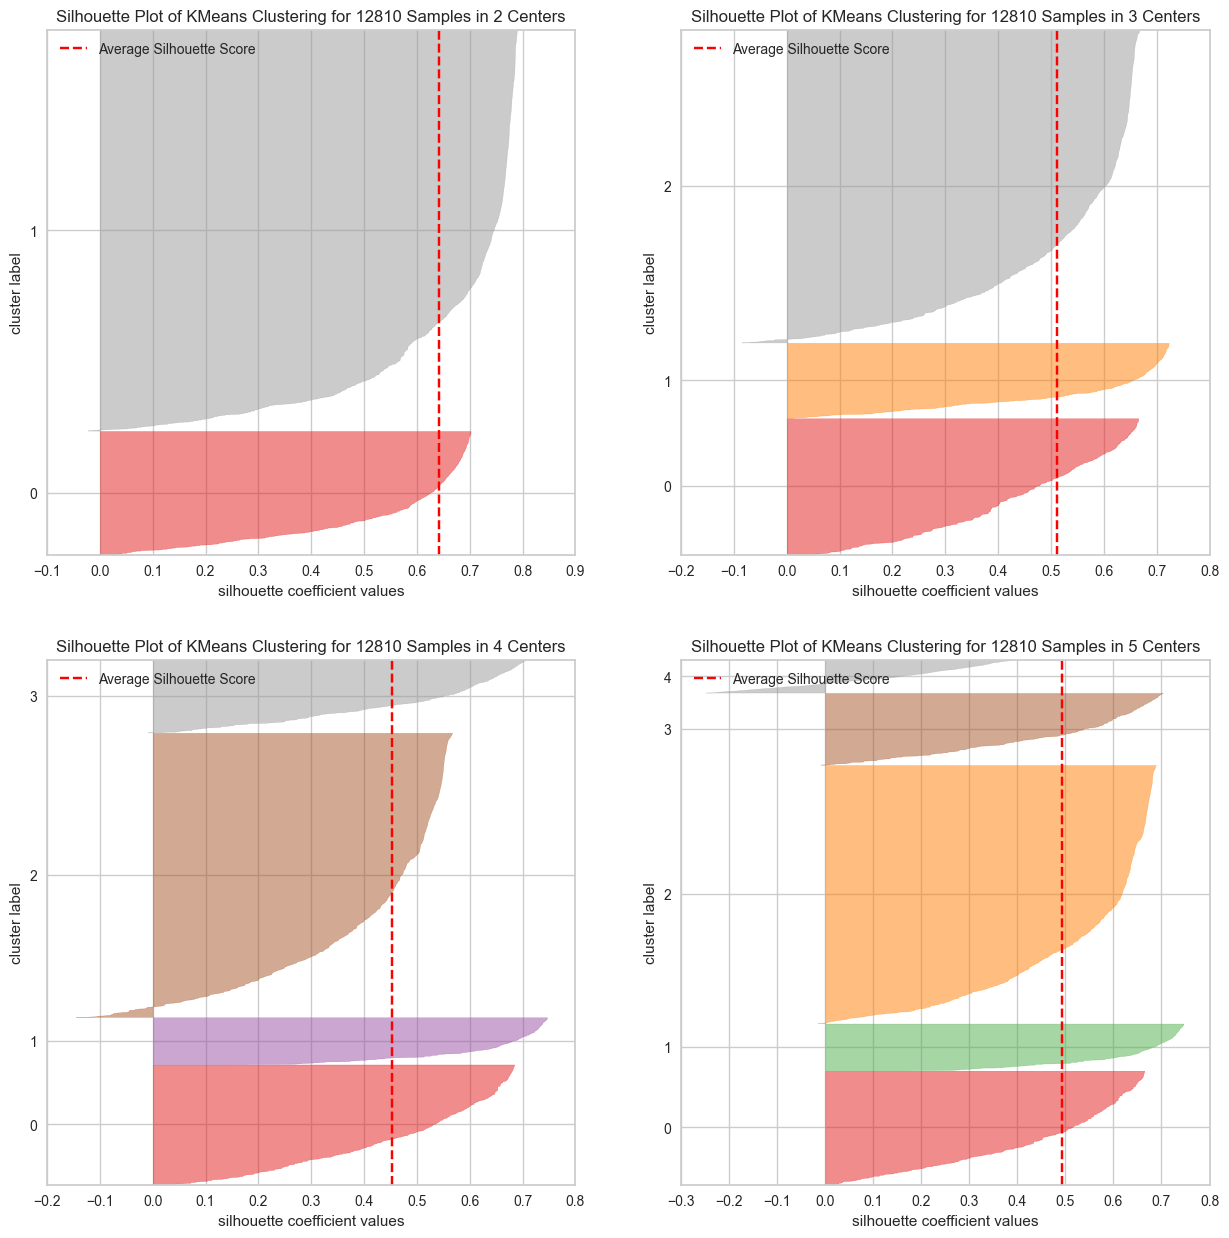

In [35]:
K = range(2,6)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2))-1, 2, figsize = (15,15))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 1000, n_init='auto')

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(dfob_cs)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

Let's go k=3 (fine silhouette plot, second highest silhouette score, business-wise better than k=2)

## K-MEANS CLUSTERING

In [12]:
# First, we create final dataset with 3 cluster labels
cluster_model = KMeans(n_clusters = 3, random_state = 1000, n_init='auto')
cluster_model.fit(dfob_cs)

KMeans(n_clusters=3, random_state=1000)

In [14]:
# Create a copy of the initial df and assign each accounts to a cluster
dfob_cl = dfob.copy()
dfob_cl['cluster'] = cluster_model.labels_
dfob_cl.head(10)

,buyer_id,last_transaction,recency_day,order_freq,gmv,aov,revenue,voucher_used,voucher_val,seller_count,num_of_seller_province,num_of_seller_city,cluster
0,631a4da47255a77e0e6d7410,2023-12-21,11,60,210014493,3.500242e+06,1575095,0,0.0,12,7,9,2
1,631a4f977255a77e0e6dec73,2023-12-29,3,110,2226297770,2.023907e+07,16697212,0,0.0,18,5,12,2
2,631a51497255a77e0e6eb585,2023-12-29,3,35,5215607524,1.490174e+08,19029058,0,0.0,15,6,12,2
3,631a514d7255a77e0e6eb6e5,2023-11-17,45,2,2370537,1.185268e+06,17779,0,0.0,1,1,1,2
4,631a514e7255a77e0e6eb785,2023-09-26,97,1,781000,7.810000e+05,5857,0,0.0,1,1,1,0
5,631a514f7255a77e0e6eb7c9,2023-12-31,1,769,44777116849,5.822772e+07,334952661,0,0.0,19,3,9,2
6,631a51507255a77e0e6eb83a,2023-09-25,98,2,18205664,9.102832e+06,136542,0,0.0,2,1,2,0
7,631a51527255a77e0e6eb8f5,2023-12-28,4,59,10932401,1.852949e+05,81980,0,0.0,28,9,23,2
8,631a51527255a77e0e6eb900,2023-12-20,12,24,124124367,5.171849e+06,930925,0,0.0,4,1,3,2
9,631a51557255a77e0e6eba0e,2023-01-25,341,1,7953000,7.953000e+06,59647,0,0.0,1,1,1,1


In [15]:
dfob_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12810 entries, 0 to 12809
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   buyer_id                12810 non-null  object        
 1   last_transaction        12810 non-null  datetime64[ns]
 2   recency_day             12810 non-null  int64         
 3   order_freq              12810 non-null  int64         
 4   gmv                     12810 non-null  int64         
 5   aov                     12810 non-null  float64       
 6   revenue                 12810 non-null  int64         
 7   voucher_used            12810 non-null  int64         
 8   voucher_val             12810 non-null  float64       
 9   seller_count            12810 non-null  int64         
 10  num_of_seller_province  12810 non-null  int64         
 11  num_of_seller_city      12810 non-null  int64         
 12  cluster                 12810 non-null  int32 

In [16]:
cluster_size = pd.DataFrame(dfob_cl['cluster'].value_counts())
cluster_size.rename(columns={'count': 'NUMBER_OF_BUYERS'}, inplace=True)
cluster_size.index.name = 'cluster'


cluster_size_sorted = cluster_size.sort_index()
cluster_size_sorted

,NUMBER_OF_BUYERS
cluster,
0,3330
1,1837
2,7643


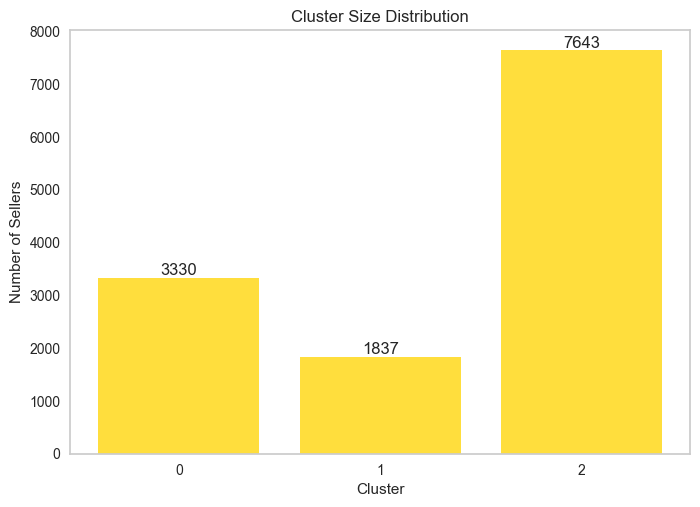

In [17]:
# Sort the DataFrame by index in descending order
cluster_size = cluster_size.sort_index(ascending=False)

# Create the vertical bar plot with yellow color
bars = plt.bar(cluster_size.index, cluster_size['NUMBER_OF_BUYERS'], color='#ffde3dff')

# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Sellers')
plt.title('Cluster Size Distribution')

# Set the x-axis ticks to show only integer values
plt.xticks(cluster_size.index, cluster_size.index, rotation=0)

# Remove grid lines
plt.grid(visible=False)

# Show the plot
plt.show()

In [18]:
# Let's re-look into data after clustering
# This take some time, no worries!
# sns.pairplot(dfob_cl,hue='cluster', diag_kind="hist")

## CLUSTER INTERPRETATION

In [19]:
# Look into averages of values
dfob_clv = dfob_cl.groupby('cluster').mean(numeric_only='True').T

formatted_dfob_clv = dfob_clv.map(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)
formatted_dfob_clv

cluster,0,1,2
recency_day,115.96,265.12,21.89
order_freq,2.22,1.19,19.57
gmv,"20,704,445.24","5,290,707.80","480,001,605.68"
aov,"8,404,659.59","4,300,547.02","15,592,419.18"
revenue,"133,256.36","39,276.44","3,109,371.11"
voucher_used,0.54,0.63,0.29
voucher_val,"37,176.63","49,118.67","14,870.09"
seller_count,1.48,1.10,3.48
num_of_seller_province,1.14,1.03,1.63
num_of_seller_city,1.27,1.05,2.38


In [20]:
dfob_clv1 = dfob_cl.groupby('cluster').min(numeric_only='True').T

formatted_dfob_clv1 = dfob_clv1.map(lambda x: '{:,.0f}'.format(x) if isinstance(x, (int, float)) else x)
formatted_dfob_clv1

cluster,0,1,2
recency_day,66,191,1
order_freq,1,1,1
gmv,2,"1,500",111
aov,1,"1,500",111
revenue,0,11,0
voucher_used,0,0,0
voucher_val,0,0,0
seller_count,1,1,1
num_of_seller_province,1,1,1
num_of_seller_city,1,1,1


In [21]:
dfob_clv2 = dfob_cl.groupby('cluster').max(numeric_only='True').T

formatted_dfob_clv2 = dfob_clv2.map(lambda x: '{:,.0f}'.format(x) if isinstance(x, (int, float)) else x)
formatted_dfob_clv2

cluster,0,1,2
recency_day,190,365,81
order_freq,16,6,"2,207"
gmv,"6,255,300,000","402,219,600","72,330,107,838"
aov,"6,255,300,000","296,469,120","12,777,784,250"
revenue,"15,638,250","3,016,646","471,524,016"
voucher_used,6,3,24
voucher_val,"10,000,000","10,000,000","1,475,000"
seller_count,10,4,86
num_of_seller_province,5,3,18
num_of_seller_city,7,3,47


In [22]:
dfob_clv3 = dfob_cl.groupby('cluster').median(numeric_only='True').T

formatted_dfob_clv3 = dfob_clv3.map(lambda x: '{:,.0f}'.format(x) if isinstance(x, (int, float)) else x)
formatted_dfob_clv3

cluster,0,1,2
recency_day,109,264,18
order_freq,1,1,7
gmv,"178,966","104,500","7,969,370"
aov,"104,265","100,004","1,257,463"
revenue,"1,342",783,"59,769"
voucher_used,0,1,0
voucher_val,0,"25,000",0
seller_count,1,1,2
num_of_seller_province,1,1,1
num_of_seller_city,1,1,2


## SAVE CLUSTER RESULT TO PICKLE AND CSV

In [29]:
# After knowing the characteristics for each cluster, I named each clusters
dfob_cl_name = dfob_cl.copy()
# Mapping dictionary
cluster_names = {0: 'Seasonal Buyer', 1: 'Small Order Occasional Buyer', 2: 'Hyper-Active Buyer'}
# Create the cluster_name column by mapping values from the cluster column
dfob_cl_name['cluster_name'] = dfob_cl['cluster'].map(cluster_names)

dfob_cl_name.head()

,buyer_id,last_transaction,recency_day,order_freq,gmv,aov,revenue,voucher_used,voucher_val,seller_count,num_of_seller_province,num_of_seller_city,cluster,cluster_name
0,631a4da47255a77e0e6d7410,2023-12-21,11,60,210014493,3.500242e+06,1575095,0,0.0,12,7,9,2,Hyper-Active Buyer
1,631a4f977255a77e0e6dec73,2023-12-29,3,110,2226297770,2.023907e+07,16697212,0,0.0,18,5,12,2,Hyper-Active Buyer
2,631a51497255a77e0e6eb585,2023-12-29,3,35,5215607524,1.490174e+08,19029058,0,0.0,15,6,12,2,Hyper-Active Buyer
3,631a514d7255a77e0e6eb6e5,2023-11-17,45,2,2370537,1.185268e+06,17779,0,0.0,1,1,1,2,Hyper-Active Buyer
4,631a514e7255a77e0e6eb785,2023-09-26,97,1,781000,7.810000e+05,5857,0,0.0,1,1,1,0,Seasonal Buyer


In [30]:
# Save dfob_cl_name as a pickle file
dfob_cl_name.to_pickle('pickles/dfob_cl_name.pkl')

# Save dfob_cl_name as a csv file
dfob_cl_name.to_csv('../__dataset/order_buyer_active_clustered.csv', index=False)

In [25]:
dfob_cl_0_seasonal = dfob_cl_name[dfob_cl_name['cluster'] == 0].copy()
dfob_cl_1_occasional = dfob_cl_name[dfob_cl_name['cluster'] == 1].copy()
dfob_cl_2_hyper = dfob_cl_name[dfob_cl_name['cluster'] == 2].copy()


In [26]:
dfob_cl_0_seasonal.to_pickle('pickles/dfob_cl_0_seasonal.pkl')
dfob_cl_0_seasonal.to_csv('../__dataset/order_buyer_active_seasonal.csv', index=False)

dfob_cl_1_occasional.to_pickle('pickles/dfob_cl_1_occasional.pkl')
dfob_cl_1_occasional.to_csv('../__dataset/order_buyer_active_occasional.csv', index=False)

dfob_cl_2_hyper.to_pickle('pickles/dfob_cl_2_hyper.pkl')
dfob_cl_2_hyper.to_csv('../__dataset/order_buyer_active_hyper.csv', index=False)